# Role of arm proprioception in calibrating the arm-eye temporal coordination - Vercher, Gauthier, Cole, and Blouin (1997)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
plt.style.use('dark_background')

In [2]:
# personal functions 
def writeGif(filenameG, filenames, supplemental=False):
    
    '''
    Save figure files as gif file and delete figures used to create gif 

    INPUTS:
    filenameG: filename for .gif file 
    filenames: filenames of individual figures to be saved together as gif
    supplemental: put in supplemental or not, boolean

    OUTPUTS:
    .gif file of files in filenmae 
    '''
    import imageio 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    with imageio.get_writer(filenameG+'.gif', mode='I',fps=5) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image) # add to gif 
            os.remove(filename) # delete individual 
    
    # Get back to original folder 
    os.chdir(cwd)

def best_save(fig_obj, fig_name, close=True, supplemental=False):
    
    '''
    Save figures easily, compact, and to various places as .png (no friendly with other formats)

    INPUTS:
    fig_obj: figure object, object 
    fig_name: figure name, string 
    close: close figure, boolean 
    supplemental: put in supplemental folder, boolean 

    OUTPUT:
    Save figure in figures folder > date > main or supplemental
    '''

    # import needed library 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    # Save 
    if '.png' in fig_name:
        fig_obj.savefig(fig_name, bbox_inches='tight', dpi=300)
    else:
        fig_obj.savefig(fig_name+'.png', bbox_inches='tight', dpi=300)

    if close: # close 
        matplotlib.pyplot.close(fig_obj)

    # Get back to original folder 
    os.chdir(cwd)

In [3]:
# create class for participants 
class participant:
    def __init__(self, EmgArm, EmgEye, ArmEye, rhoArmEye_EmgEye, rhoEmgEye_EmgArm, rhoArmEye_EmgArm, who, N=300):
        # inputs are size [2,], where [0] = mean, [1] = sd 
        self.emgarmMu = EmgArm[0]
        self.emgarmSd = EmgArm[1]
        self.emgeyeMu = EmgEye[0]
        self.emgeyeSd = EmgEye[1]
        self.armeyeMu = ArmEye[0]
        self.armeyeSd = ArmEye[1]
        self.rhoAEEE = rhoArmEye_EmgEye
        self.rhoEEEA = rhoEmgEye_EmgArm
        self.rhoAEEA = rhoArmEye_EmgArm
        self.who = who

        self.N = N

        self.simData() # simulate some data 

    def simData(self):
        Mu = np.array([self.emgarmMu,self.emgeyeMu,self.armeyeMu])
        Sig = np.array([[self.emgarmSd**2,self.emgarmSd*self.emgeyeSd*self.rhoEEEA,self.emgarmSd*self.armeyeSd*self.rhoAEEA],
                        [self.emgarmSd*self.emgeyeSd*self.rhoEEEA,self.emgeyeSd**2,self.emgeyeSd*self.armeyeSd*self.rhoAEEE],
                        [self.emgarmSd*self.armeyeSd*self.rhoAEEA,self.armeyeSd*self.emgeyeSd*self.rhoAEEE,self.armeyeSd**2]])
        D = np.random.multivariate_normal(Mu, Sig, self.N)
        self.EMGARM = D[:,0]
        self.EMGEYE = D[:,1]
        self.ARMEYE = D[:,2]

    def visHistograms(self):
        # visualize 
        fig = plt.figure(figsize=(14,4))
        plt.subplot(1,3,1)
        plt.hist(self.EMGARM)
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.xlim([-300, 300])
        plt.ylim([0, 100])
        plt.ylabel('Frequency')
        plt.title('emg/arm')
        plt.subplot(1,3,2)
        plt.hist(self.EMGEYE)
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.xlim([-300, 300])
        plt.ylim([0, 100])
        plt.xlabel('Time (ms)')
        plt.title('emg/eye')
        plt.subplot(1,3,3)
        plt.hist(self.ARMEYE)
        plt.xlim([-300, 300])
        plt.ylim([0, 100])
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title('arm/eye')
        
        plt.suptitle(self.who)  
        plt.tight_layout()  
        plt.show()

        return fig

    def visCorrelations(self):
        fig = plt.figure(figsize=(14,4))
        plt.subplot(1,3,1)
        plt.scatter(self.EMGARM, self.EMGEYE)
        plt.axhline(0, color='w')
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.xlim([0, 600])
        plt.ylim([-200, 800])
        plt.xlabel('emg-arm')
        plt.ylabel('emg-eye')
        plt.subplot(1,3,2)
        plt.scatter(self.EMGARM, self.ARMEYE)
        plt.axhline(0, color='w')
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.xlim([0, 600])
        plt.ylim([-300, 200])
        plt.xlabel('emg-arm')
        plt.ylabel('arm-eye')
        plt.subplot(1,3,3)
        plt.scatter(self.EMGEYE, self.ARMEYE)
        plt.axhline(0, color='w')
        plt.axvline(0, color='w')
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.xlim([-100, 400])
        plt.ylim([-300, 200])
        plt.xlabel('emg-eye')
        plt.ylabel('amr-eye')

        plt.suptitle(self.who) 
        plt.tight_layout()
        plt.show()

        return fig

    def visBehaviorEx(self):
        # randomly sample some latencies 
        rndIdx = int(round(np.random.uniform(low=0, high=self.N)))
        emgarmLat, emgeyeLat, armeyeLat = self.EMGARM[rndIdx], self.EMGEYE[rndIdx], self.ARMEYE[rndIdx]

        # arm
        armDelays = int((emgarmLat/2))
        tArm = np.linspace(0, 3, 3000-int(emgarmLat)) # time 
        tArm = np.concatenate([np.zeros(np.abs(armDelays)), tArm, np.ones(np.abs(armDelays))*3])
        Hz, amp = 0.3, np.deg2rad(10)
        xArm = amp * np.sin(2*np.pi*Hz*tArm) # x-values 

        # emg 
        tEmg = np.linspace(0,3,3000)
        ysin = amp * np.sin(2*np.pi*np.deg2rad(50)*tEmg+500)
        emg = np.diff(ysin) / np.diff(tEmg)
        emg -= np.min(emg)

        # eye 
        eyeDelays = int(emgarmLat/2)+int(armeyeLat/2)
        tEye = np.linspace(0, 3, 3000-(int(emgarmLat)+int(armeyeLat)))
        tEye = np.concatenate([np.zeros(np.abs(eyeDelays)*2), tEye])
        xEye = amp * np.sin(2*np.pi*Hz*tEye)

        # figure stuff 
        y = [0] * 3000 # y-values
        overallT = np.linspace(0, 3, 3000)

        # plot 
        fig = self.plotTrial(xArm=xArm, xEye=xEye, y=y, overallT=overallT, emg=emg)

        return fig, xArm, xEye, y, overallT, emg

    def plotTrial(self, xArm, xEye, y, overallT, emg, i=0, show=True):
        fig = plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        if len(xArm) < len(y):
            plt.plot(xArm,y[0:len(xArm)],lw=2)
        elif len(xArm) > len(y):
            plt.plot(xArm[0:len(y)],y,lw=2)
        else : 
            plt.plot(xArm, y, lw=2)
        plt.scatter(xArm[i], y[i],marker='d',label='Arm')
        plt.scatter(xEye[i], y[i],marker='d',label='Eye')
        plt.legend(loc=0)
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.subplot(1,3,2)
        if len(xArm) < len(overallT):
            plt.plot(overallT[0:len(xArm)], np.rad2deg(xArm), lw=2, label='Arm')
        elif len(xArm) > len(overallT):
            plt.plot(overallT, np.rad2deg(xArm[0:len(overallT)]), lw=2, label='Arm')
        else :
            plt.plot(overallT, np.rad2deg(xArm), lw=2, label='Arm')
        if len(xEye) < len(overallT):
            plt.plot(overallT[0:len(xEye)], np.rad2deg(xEye), lw=2, label='Eye')
        elif len(xEye) > len(overallT):
            plt.plot(overallT, np.rad2deg(xEye[0:len(overallT)]), lw=2, label='Eye')
        else : 
            plt.plot(overallT, np.rad2deg(xEye), lw=2, label='Eye')
        plt.axvline(overallT[i], color='w', linestyle='--')
        plt.legend(loc=0)
        plt.xlabel('Time (s)')
        plt.ylabel('X (m)')
        plt.subplot(1,3,3)
        plt.plot(overallT[:-1], emg)
        plt.axvline(overallT[i], color='w', linestyle='--')
        plt.xlabel('Time (s)')
        plt.ylabel('emg force (a.u.)')
        if self.who == 'I.W.':
            sbjtype = 'Deafferented'
        elif self.who == 'Control':
            sbjtype = self.who
        plt.suptitle('Example '+ sbjtype +' Trial')
        plt.tight_layout()
        if show:
            plt.show()

        return fig

    def gifBehavior(self): 
        fnames = [] 
        _, xArm, xEye, y, overallT, emg = self.visBehaviorEx()
        for i in range(0, 2999, 50):
            fig = self.plotTrial(xArm=xArm, xEye=xEye, y=y, overallT=overallT, emg=emg,i=i, show=False)

            filename = f'{i}.png'
            fnames.append(filename)
            best_save(fig, filename)

        writeGif('ExT_'+self.who, fnames)


In [4]:
controls = participant(EmgArm=(76,27), EmgEye=(77,37), ArmEye=(1.06,31), rhoArmEye_EmgEye=0.58, rhoEmgEye_EmgArm=0.32, rhoArmEye_EmgArm=0, who='Control')
IW = participant(EmgArm=(111,105), EmgEye=(110,121), ArmEye=(-0.15,96), N=250, rhoArmEye_EmgEye=0, rhoEmgEye_EmgArm=0.50, rhoArmEye_EmgArm=0, who='I.W.')

## Figures 1 and 2 Simulation

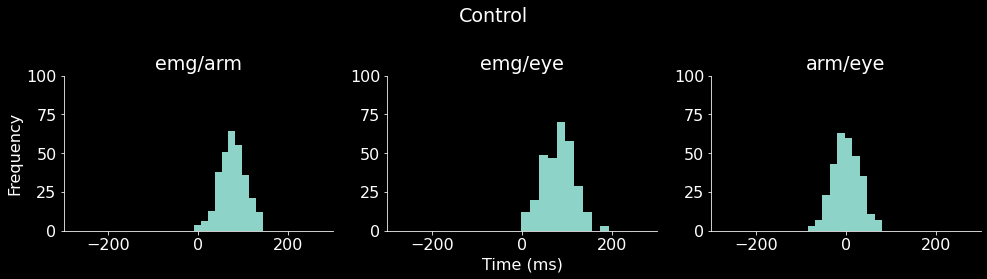

In [5]:
fig = controls.visHistograms()
best_save(fig, 'controlHist')

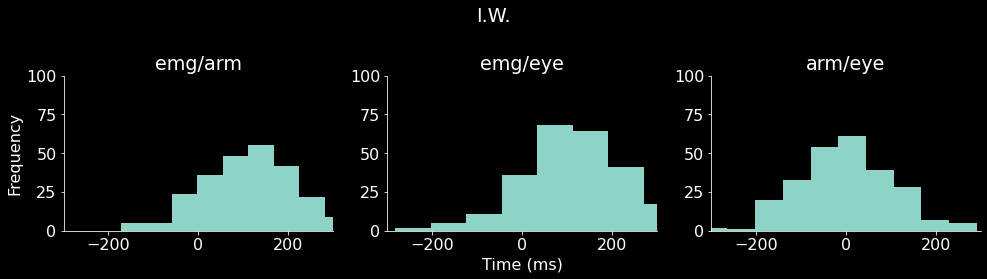

In [6]:
fig = IW.visHistograms()
best_save(fig, 'deaffHist')

## Figure 3

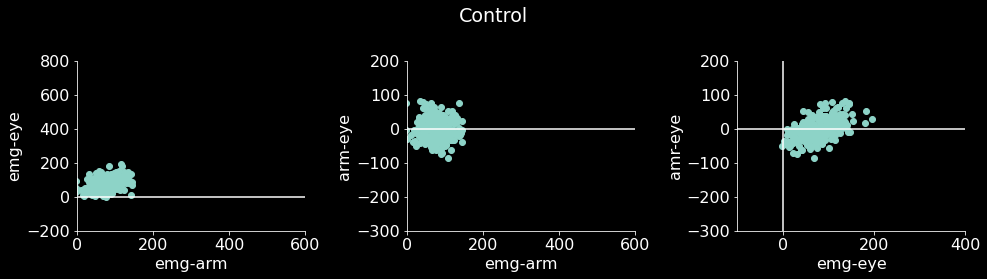

In [7]:
fig = controls.visCorrelations()
best_save(fig, 'controlCorr')

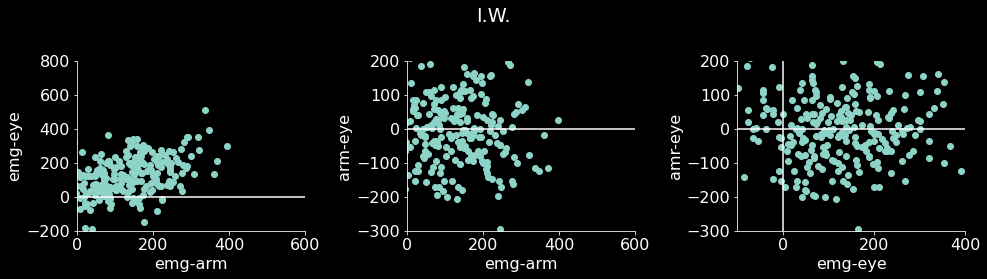

In [8]:
fig = IW.visCorrelations()
best_save(fig, 'deaffCorr')

## Simulate some behavior

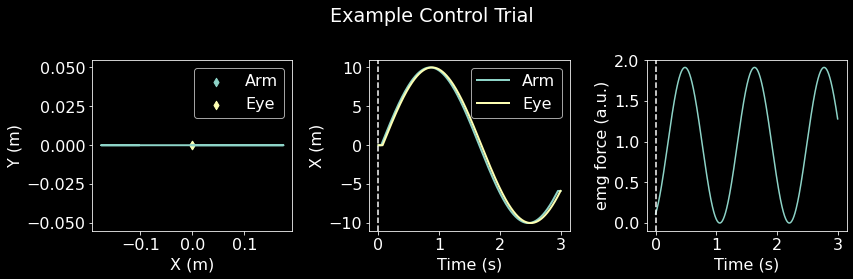

In [9]:
fig,_,_,_,_,_ = controls.visBehaviorEx()
best_save(fig, 'controlEx')

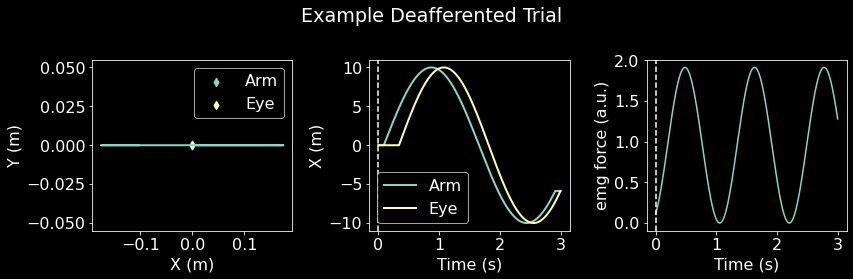

In [10]:
fig,_,_,_,_,_ = IW.visBehaviorEx()
best_save(fig, 'deaffEx')

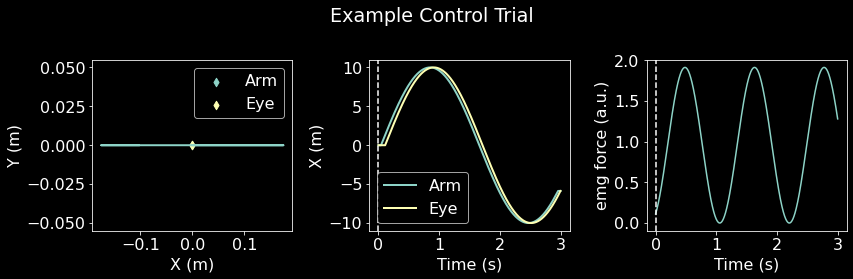

In [11]:
controls.gifBehavior()

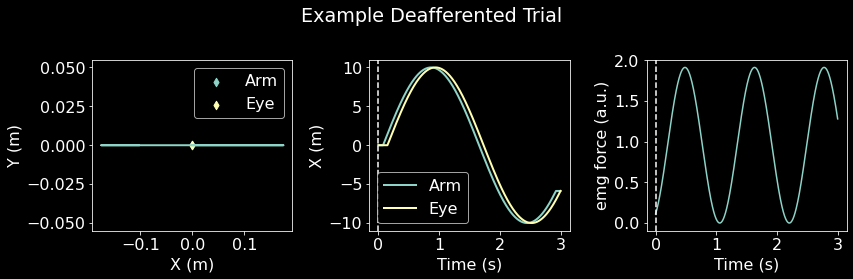

In [12]:
IW.gifBehavior()